In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from dmdholo.fields_propagation.fourier_filter import fourier_filter
from dmdholo.holograms.dmd_holograms import parallel_lee,  orthogonal_lee, holo_SP, holo_Haskell
from dmdholo.holograms.generate_LUT import generate_lut

from dmdholo.plotting.plot_funs import colorize
from dmdholo.plotting.specialized_functions import plot_holoWzoom, plot_four, \
    add_linesNcircs, plot_amp_phase_proj

(-0.5, 779.5, 779.5, -0.5)

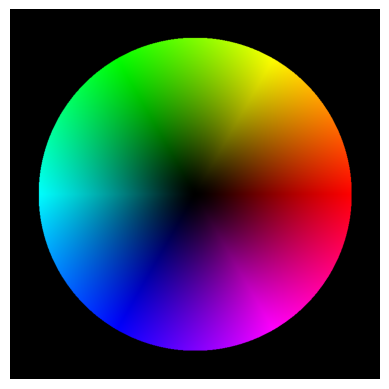

In [2]:
nx = 780 ; ny = 780
X,Y = np.meshgrid(np.arange(nx)-nx/2,np.arange(ny)-ny/2)
rad_vort = 330
X /= rad_vort
Y /= rad_vort
sc = 2*rad_vort/nx
target_field = (X-1j*Y)*(X**2+Y**2<1**2)
target_field  /= np.max(np.abs(target_field))
plt.imshow(colorize(target_field))
plt.gca().axis('off')

In [3]:
px = 4
nuvec = np.array((1/px,1/px**2)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/6

In [4]:
f_val, px_comb, lut = generate_lut('sp', px)

holo = holo_SP(target_field, lut, px_comb)

In [14]:
shaped_field, ft_holo = fourier_filter(holo, nuvec, SA_filter, get_ft=True)
ft_holo_int = np.square(np.abs(ft_holo))
ft_holo_log = 10 * np.log10(ft_holo_int)

err_amp = np.abs(shaped_field) - np.abs(target_field)
err_amp_norm = np.abs(shaped_field) / np.max(np.abs(shaped_field)) - np.abs(target_field) / np.max(np.abs(target_field))
err_phi = np.angle(np.exp(1j * (np.angle(shaped_field) - np.angle(target_field))))

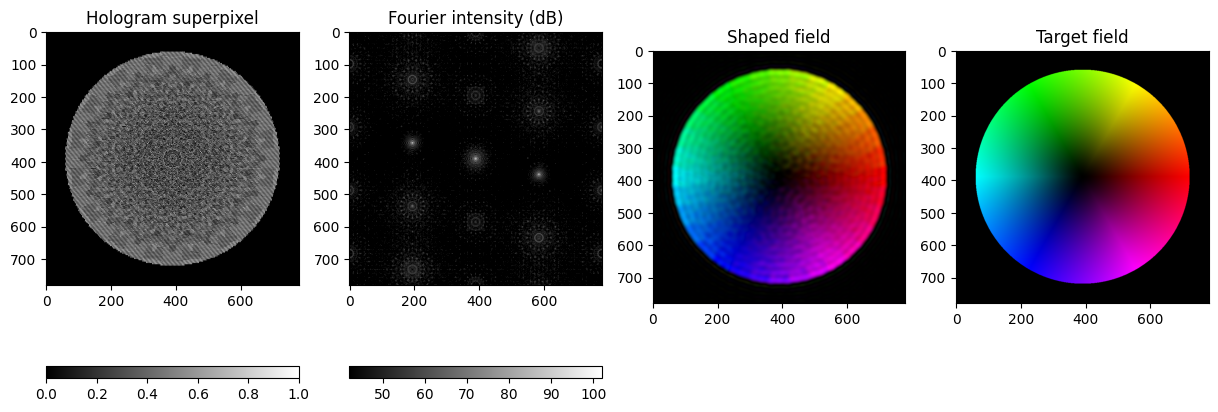

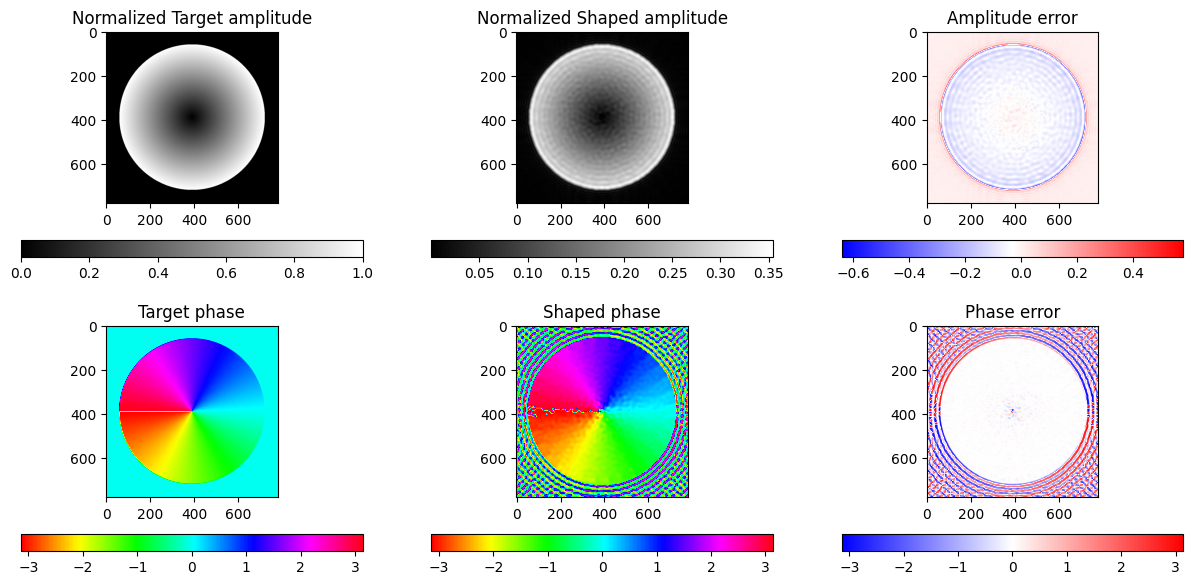

In [15]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.imshow(holo, cmap='gray')
plt.title('Hologram superpixel')
plt.colorbar(location = 'bottom')

plt.subplot(1, 4, 2)
plt.imshow(ft_holo_log, cmap='gray', vmax=np.max(ft_holo_log), vmin=np.max(ft_holo_log)-60)
plt.title('Fourier intensity (dB)')
plt.colorbar(location = 'bottom')

plt.subplot(1, 4, 3)
plt.imshow(colorize(shaped_field))
plt.title('Shaped field')

plt.subplot(1, 4, 4)
plt.imshow(colorize(target_field))
plt.title('Target field')

plt.show()


fig = plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.imshow(np.abs(target_field), cmap='gray')
plt.title('Normalized Target amplitude')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(shaped_field), cmap='gray')
plt.title('Normalized Shaped amplitude')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 3)
plt.imshow(err_amp_norm, cmap='bwr')
plt.title('Amplitude error')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 4)
plt.imshow(np.angle(target_field), cmap='hsv')
plt.title('Target phase')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 5)
plt.imshow(np.angle(shaped_field), cmap='hsv')
plt.title('Shaped phase')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 6)
plt.imshow(err_phi, cmap='bwr')
plt.title('Phase error')
plt.colorbar(location = 'bottom')


plt.show()